## In this file we will use the KeplerMapper python class with a one-variable filter

Importing KeplerMapper

In [31]:
import km

Calculating important stuff with the data

In [32]:
import pandas as pd
import numpy as np

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#Visualization param
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [33]:
df = pd.read_csv('../../Data/NBA-data-With-Positions.csv')

In [34]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}
invdict = {v: k for k, v in dict.iteritems()}

position_labels = [dict[x] for x in df['PosicAbbrev']]
df_numVar = df.select_dtypes(include=['number']).drop('Unnamed: 0',1)

In [35]:
newdf = df_numVar.as_matrix()

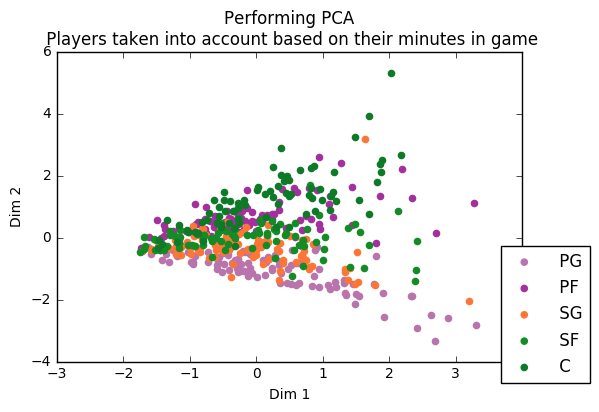

In [36]:
auxnames = ['REB','AST','TOV','STL','BLK','PF','PTS']
df_final = df_numVar[auxnames]

df_scaled = sk.preprocessing.scale(df_final)
pca = sk.decomposition.PCA(n_components=2, whiten=True)
df_red = pca.fit_transform(df_scaled)

statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

import matplotlib.patches as mpatches
pylab.title("Performing PCA\n Players taken into account based on their minutes in game")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [invdict[x] for x in [1,2,3,4,5]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()

Function that calculates angle between vectors:

In [37]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [38]:
Nsize = df_red.shape[0]

#getting point the farthest to the left
auxX = np.argmin(df_red[:,0])
auxXY = df_red[auxX,:]

filterdf = np.array([[angle_between(auxXY-df_red[i,:],np.array([1,0])) for i in range(Nsize)]])

In [39]:
filtereddf = np.append(df_red,filterdf.T,axis=1)

Replacing NAN with 0

In [40]:
filtereddf = np.nan_to_num(filtereddf)

Using keplermapper

In [41]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

#scale data to transform the euclidean distance into the variance normalized euclidean distance
scaleddf = scale(filtereddf)

# Fit to and transform the data
projected_data = mapper.fit_transform(scaleddf, projection=[0,1], scaler = None) # filter column

# Create dictionary called 'complex' with nodes, edges and meta-information
complex = mapper.map(projected_data, inverse_X = scaleddf[:,:2], nr_cubes=30, overlap_perc=.4)

# Visualize it
mapper.visualize(complex, path_html="NBA_keplermapper_angle_output.html", 
                 title="Mapper_on_NBA_data")


..Projecting data using: [0, 1]
Mapping on data shaped (476L, 2L) using dimensions

Creating 27000 hypercubes.

created 236 edges and 120 nodes in 0:00:01.231000.

Wrote d3.js graph to 'NBA_keplermapper_angle_output.html'
